# **CAPSTONE MODULE 3**

## **Telco Customer Churn**

### **Latar Belakang**

Dalam industri telekomunikasi, churn pelanggan adalah salah satu tantangan terbesar yang dihadapi perusahaan. Churn terjadi ketika pelanggan berhenti menggunakan layanan perusahaan dan beralih ke penyedia layanan lain. Mengurangi churn sangat penting karena biaya untuk mendapatkan pelanggan baru sering kali lebih tinggi daripada mempertahankan pelanggan yang sudah ada.

Telco adalah salah satu perusahaan dalam industri telekomunikasi, melalui dataset dari perusahaan yang berisi profil pelanggan tentang pengunaan layanan Telco, Telco ingin mengetahui prediksi pelanggan yang akan berhenti berlangganan (Churn) atau tidak. Seorang Data Analis ditugaskan untuk membuat model untuk memprediksi kemungkinan Churn atau tidaknya seorang Customer melalui Machine Learning.

Target: 

Churn       : 1

Tidak Churn : 0

### **Business Problem**

Dalam konteks churn pelanggan pada perusahaan telekomunikasi, churn merujuk pada tingkat di mana pelanggan berhenti menggunakan layanan perusahaan, baik dengan membatalkan langganan atau beralih ke penyedia lain. Telco menghadapi tantangan yang signifikan dengan tingkat churn pelanggan sebesar 26.7%. Ini berarti sekitar satu dari empat pelanggan meninggalkan layanan perusahaan dalam periode tertentu. Churn pelanggan yang tinggi dapat berdampak serius pada pendapatan dan profitabilitas perusahaan, karena mempertahankan pelanggan yang sudah ada umumnya lebih murah daripada mendapatkan pelanggan baru.

Perusahaan ingin mengurangi tingkat churn dengan mengidentifikasi pelanggan yang paling mungkin churn dan mengambil langkah-langkah proaktif untuk mempertahankan mereka. Tujuan utamanya adalah:

**Mengidentifikasi Pelanggan Berisiko Tinggi:** 

Menggunakan model prediktif untuk secara akurat mengidentifikasi pelanggan yang paling mungkin churn sehingga perusahaan dapat fokus pada upaya retensi mereka.

**Mengurangi Tingkat Churn:** 

Target spesifik bisa berupa pengurangan tingkat churn sebesar 5%, yang akan menghasilkan peningkatan signifikan dalam pendapatan yang dipertahankan.


### **Goals**

Pengembangan dan implementasi model machine learning untuk prediksi churn. Model ini akan memungkinkan perusahaan untuk:

- Menyusun strategi retensi yang lebih efektif dan efisien.

- Mengalokasikan sumber daya secara lebih bijaksana, berfokus pada pelanggan yang paling berisiko.

- Mengukur keberhasilan strategi retensi melalui pengurangan nyata dalam tingkat churn.

### **Metric Evaluation**

- Type 1 Error : False Positive

Terlalu banyak upaya retensi yang sia-sia pada pelanggan yang sebenarnya tidak berisiko churn bisa meningkatkan biaya

- Type 2 Error : False Negative

Gagal mempertahankan pelanggan yang berisiko churn bisa mengakibatkan kehilangan pendapatan.

**False negatives dianggap lebih berbahaya karena dampaknya langsung pada pendapatan. Kehilangan pelanggan, terutama pelanggan yang bernilai tinggi, bisa memiliki dampak finansial yang signifikan.**

In [4]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier,StackingClassifier

import warnings
warnings.filterwarnings('ignore')

### **Data Understanding**

Sebelum melakukan analisis lebih lanjut atau membangun model prediksi, ada baik nya untuk melakukan Data Understanding, Data Undeerstanding bertujuan untuk mendapatkan wawasan mendalam tentang data yang kita miliki. Untuk mempelajari dataset berikut ini, tahap yang dilakukan adalah sebagai berikut:



**Identifikasi Kolom dan Tipe Data**: Mengetahui nama kolom dan tipe datanya (numerik, kategorikal, teks, dll.) untuk menentukan teknik analisis yang tepat.

**Missing Values**: Mengidentifikasi dan menangani nilai yang hilang atau kosong.

**Korelasi Antar Fitur**: Menggunakan korelasi untuk mengetahui hubungan antar fitur, yang bisa membantu dalam seleksi fitur dan memahami keterkaitan antar variabel.

**Identifikasi Kolom dan Tipe Data**

In [5]:
# Load Dataset

data = pd.read_csv('data_telco_customer_churn.csv')
data['Churn'] = np.where(data['Churn'] == 'Yes', 1,0)
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,0
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,0
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,0
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,1


#### **Data Description**

- Dependents: Apakah pelanggan memiliki tanggungan (Yes/No).
- Tenure: Lama waktu pelanggan telah menggunakan layanan (dalam bulan).
- OnlineSecurity: Apakah pelanggan menggunakan layanan keamanan online (Yes/No/No internet service).
- OnlineBackup: Apakah pelanggan menggunakan layanan backup online (Yes/No/No internet service).
- InternetService: Jenis layanan internet yang digunakan oleh pelanggan (DSL/Fiber optic/No).
- DeviceProtection: Apakah pelanggan menggunakan layanan perlindungan perangkat (Yes/No/No internet service).
- TechSupport: Apakah pelanggan menggunakan layanan dukungan teknis (Yes/No/No internet service).
- Contract: Jenis kontrak yang dimiliki oleh pelanggan (Month-to-month/One year/Two year).
- PaperlessBilling: Apakah pelanggan menggunakan penagihan tanpa kertas (Yes/No).
- MonthlyCharges: Biaya bulanan yang dibayar oleh pelanggan.
- Churn: Apakah pelanggan berhenti berlangganan (Yes/No).

(Variabel Churn sudah di-encode menjadi: Yes = 1 (Berhenti berlangganan), No = 0 (Tidak berhenti berlangganan).)


In [6]:
#Check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 404.5+ KB


### **Missing Value Check**

In [7]:
# Check % Missing Value

round(data.isna().sum()/len(data)*100,2)

Dependents          0.0
tenure              0.0
OnlineSecurity      0.0
OnlineBackup        0.0
InternetService     0.0
DeviceProtection    0.0
TechSupport         0.0
Contract            0.0
PaperlessBilling    0.0
MonthlyCharges      0.0
Churn               0.0
dtype: float64

### **Show General Information**

In [8]:
# Menunjukan General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in data.columns :
    list_item.append([
        i,
        data[i].dtype,
        data[i].isna().sum(),
        round(data[i].isna().sum()/len(data)*100, 2),
        data[i].nunique(),
        data[i].unique()[:3]
    ])


info_df = pd.DataFrame(list_item,columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64]"
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85]"


### **Mendeteksi Outlier pada dataset**

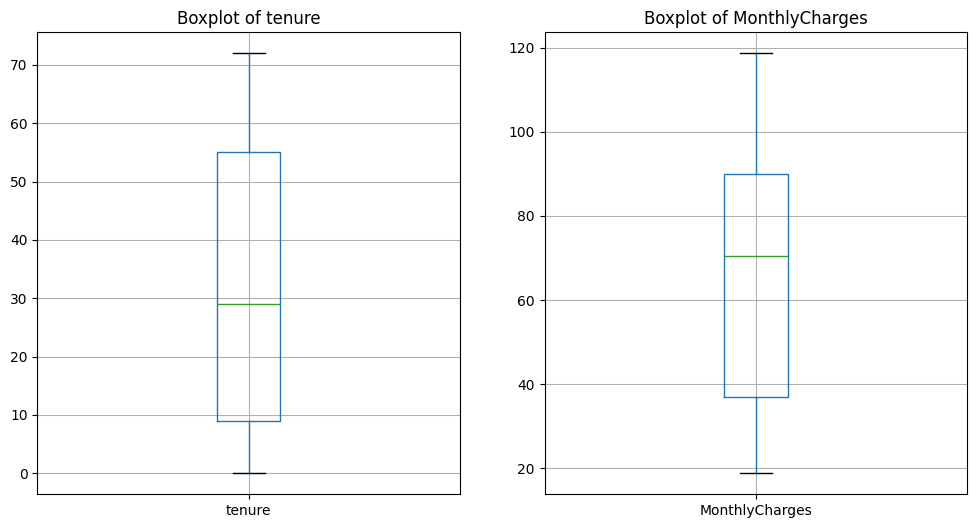

In [9]:
# Numerical features
numerical_variables = ['tenure', 'MonthlyCharges']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_variables):
    plt.subplot(1, 2, i+1)
    data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
plt.show()

Dari hasil analisis ini, kita dapat menyimpulkan bahwa dataset numerik tidak mengandung outliers yang signifikan. Oleh karena itu, kita tidak perlu melakukan penanganan khusus untuk outliers pada fitur numerik ini.

### **Distribution Analysis**

#### **Distribution for Numerical Features**

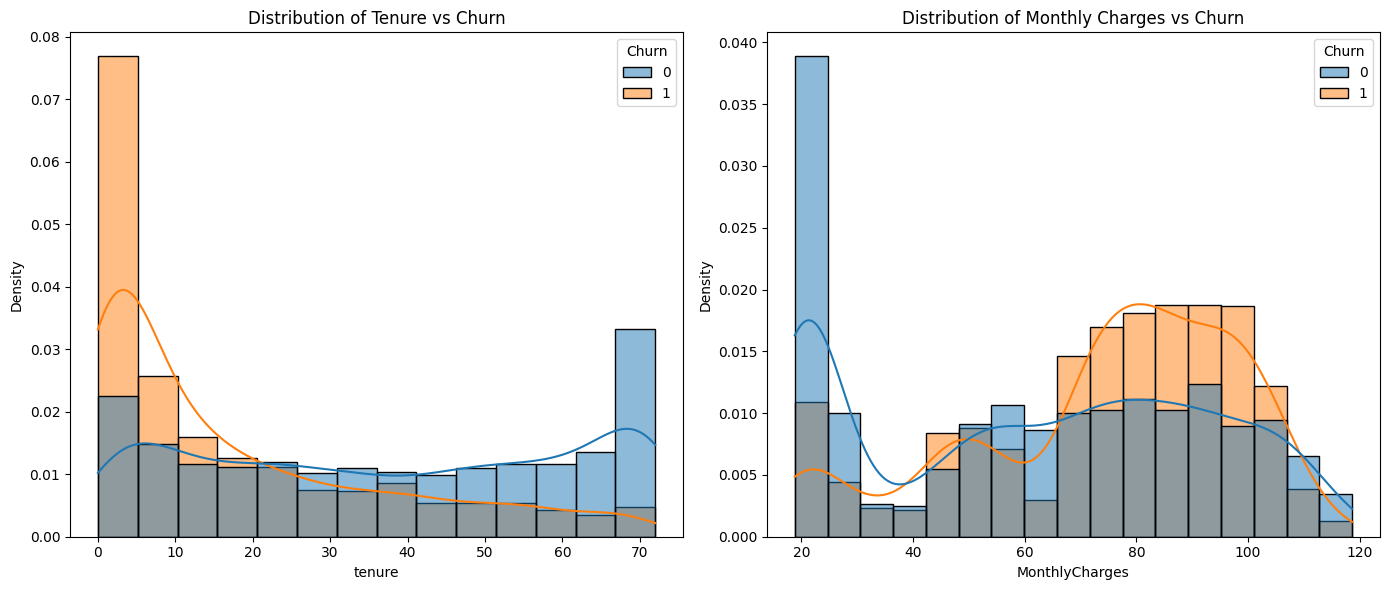

In [10]:
plt.figure(figsize=(14, 6))

# Plot distribution of 'tenure' vs 'Churn'
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, stat="density", common_norm=False)
plt.title('Distribution of Tenure vs Churn')

# Plot distribution of 'MonthlyCharges' vs 'Churn'
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, stat="density", common_norm=False)
plt.title('Distribution of Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

**Tenure vs Churn**: Distribusi menunjukkan bahwa pelanggan dengan masa keanggotaan (tenure) yang lebih rendah cenderung memiliki tingkat churn yang lebih tinggi. Seiring dengan meningkatnya masa keanggotaan, kemungkinan churn semakin menurun, yang mengindikasikan bahwa pelanggan jangka panjang cenderung lebih kecil kemungkinannya untuk churn.

**Monthly Charges vs Churn**: Distribusi menunjukkan bahwa pelanggan dengan biaya bulanan (Monthly Charges) yang lebih tinggi memiliki kemungkinan churn yang sedikit lebih besar. Terdapat perbedaan yang jelas dalam distribusi antara pelanggan yang churn dan yang tidak, di mana pelanggan yang churn cenderung memiliki biaya bulanan yang lebih tinggi rata-rata.








#### **Distribution for Categorical Features**

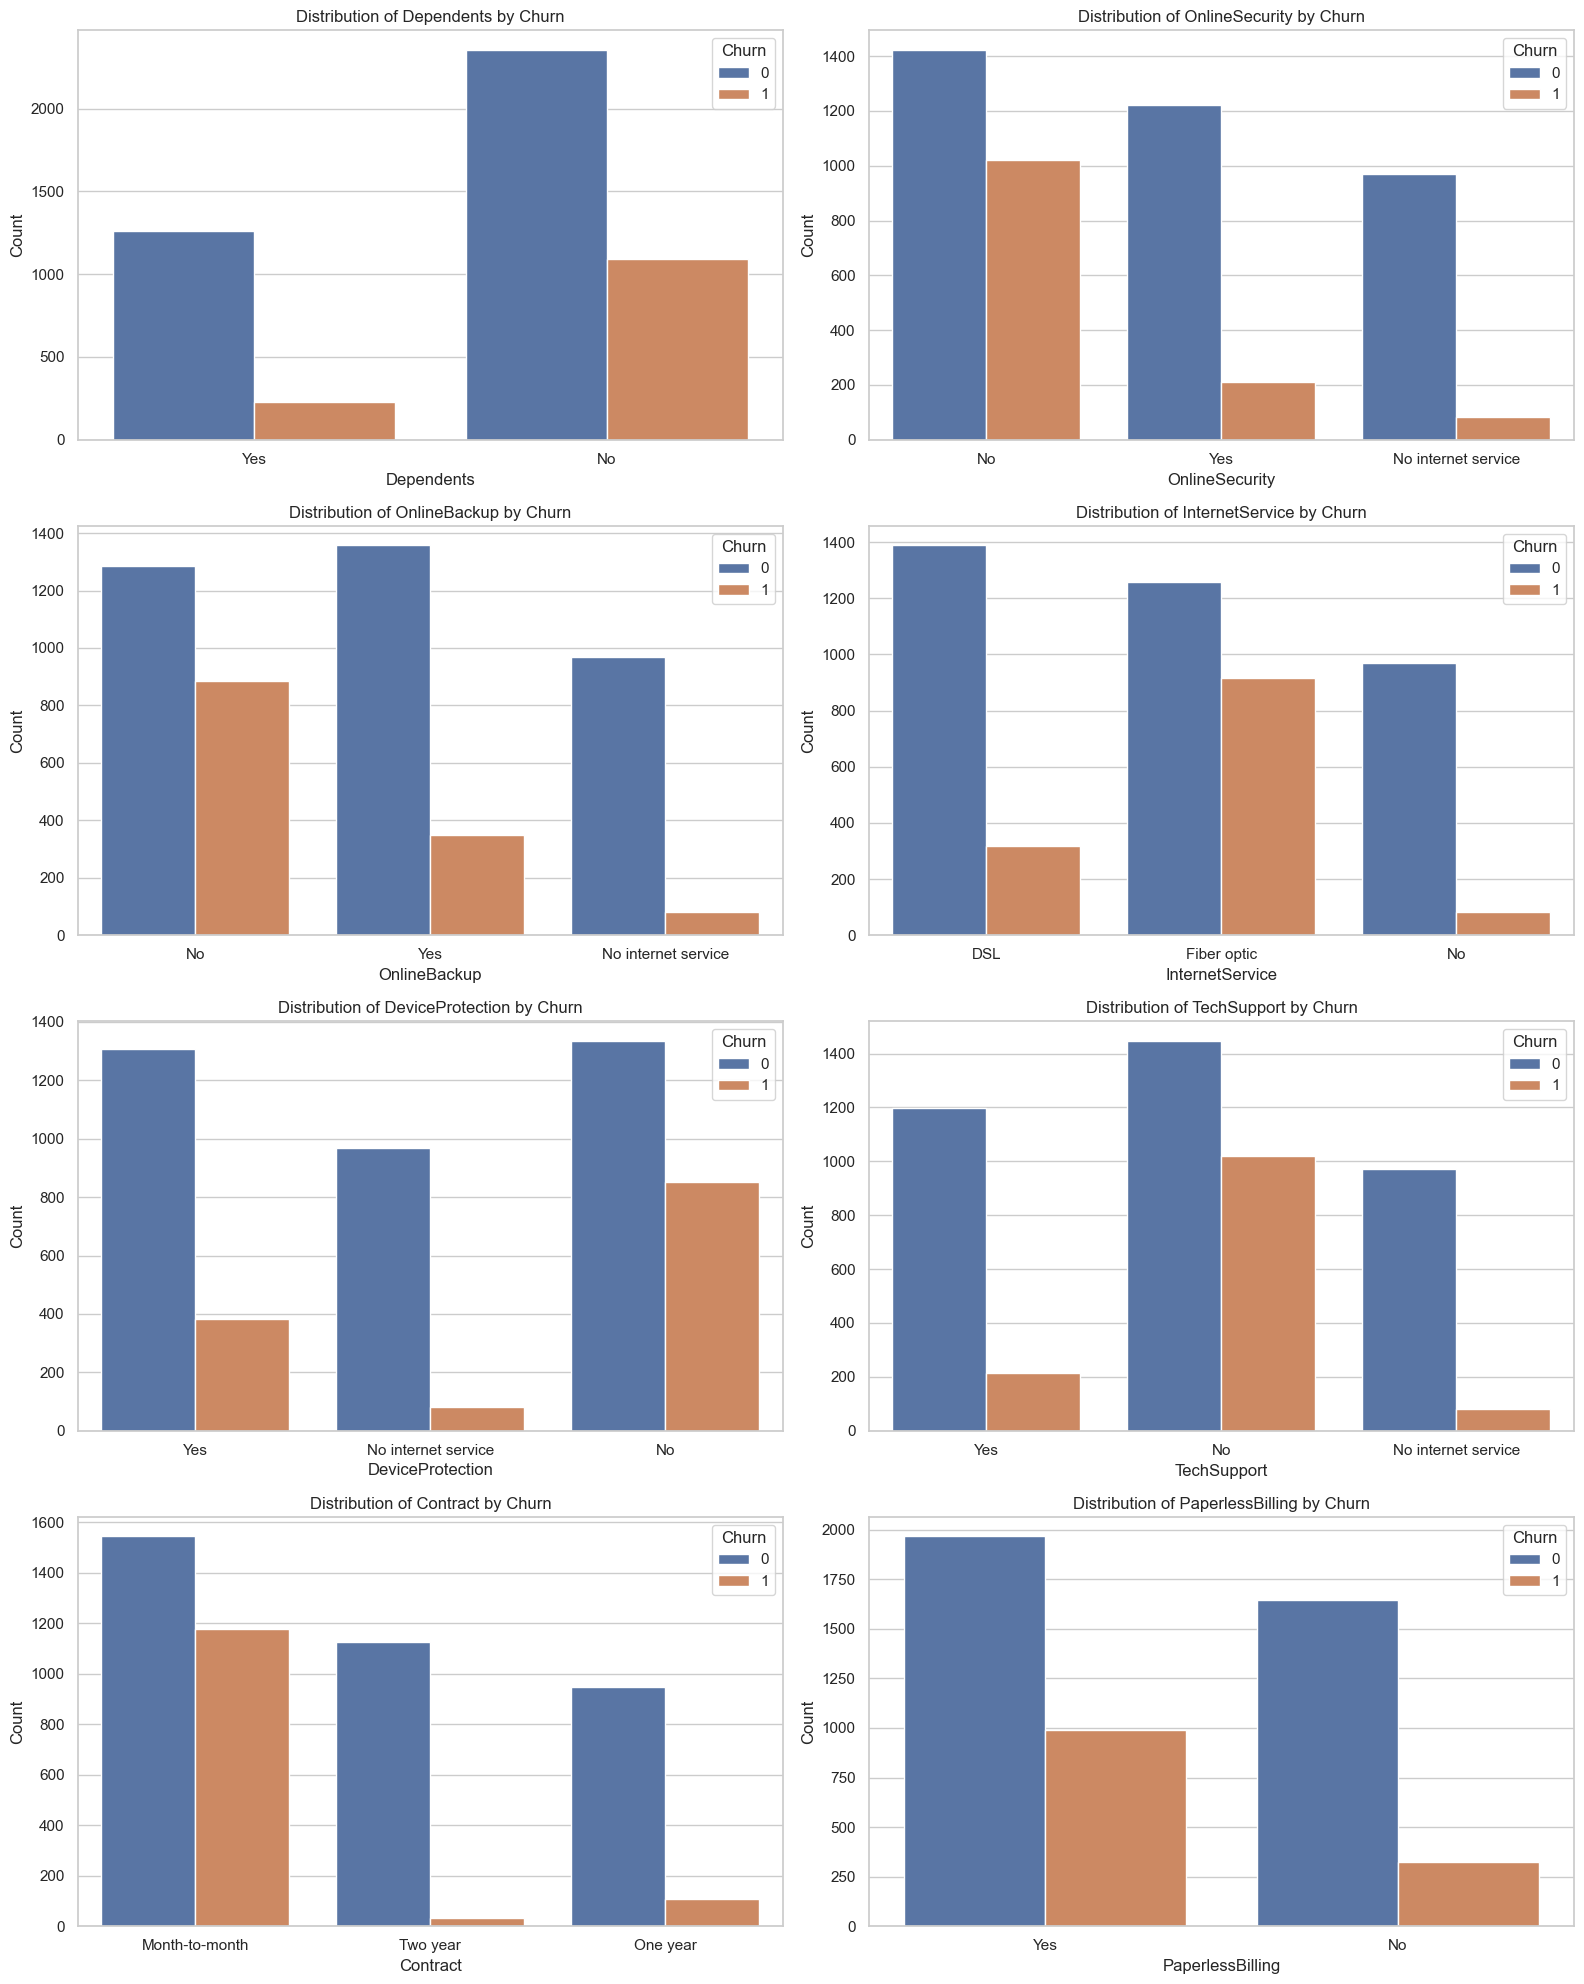

In [11]:
# Set the plotting style
sns.set(style="whitegrid")

# List of categorical features
cat_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Plot the distribution of categorical features against the target variable "Churn"
plt.figure(figsize=(16, 20))
for i, feature in enumerate(cat_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Dependents: Pelanggan tanpa tanggungan memiliki tingkat churn yang lebih tinggi dibandingkan dengan mereka yang memiliki tanggungan.

- OnlineSecurity: Pelanggan yang tidak memiliki keamanan online, atau tidak memiliki layanan internet, cenderung memiliki tingkat churn yang lebih tinggi dibandingkan dengan mereka yang memiliki keamanan online.

- OnlineBackup: Mirip dengan keamanan online, pelanggan tanpa layanan pencadangan online menunjukkan tingkat churn yang lebih tinggi.

- InternetService: Pelanggan dengan layanan internet fiber optic memiliki tingkat churn yang lebih tinggi dibandingkan dengan mereka yang menggunakan DSL atau tidak memiliki layanan internet.

- DeviceProtection: Pelanggan tanpa perlindungan perangkat lebih mungkin untuk churn dibandingkan dengan mereka yang memilikinya.

- TechSupport: Kurangnya dukungan teknis dikaitkan dengan tingkat churn yang lebih tinggi.

- Contract: Kontrak bulanan memiliki tingkat churn tertinggi, diikuti oleh kontrak satu tahun, sementara kontrak dua tahun memiliki tingkat churn terendah.

- PaperlessBilling: Pelanggan dengan penagihan tanpa kertas memiliki tingkat churn yang sedikit lebih tinggi dibandingkan dengan mereka yang tidak menggunakan penagihan tanpa kertas.

Ini menunjukkan bahwa layanan yang lebih kuat atau mendorong pelanggan untuk berkomitmen pada kontrak jangka panjang dapat berpotensi mengurangi tingkat churn.

### **Feature Selection**

Menggunakan Chi Square Test dan Corellation matrix untuk mengetahui hubungan antar fitur, yang bisa membantu dalam seleksi fitur dan memahami keterkaitan antar variabel.

In [12]:
# Feature Selection (Categorical) Chi Square Test

hasil = []

for i in data.select_dtypes(include=['object']) :
    contigency_table = pd.crosstab(data[i],data['Churn'])
    stat, pval,df,expected_freq = chi2_contingency(contigency_table)
    berpengaruh = pval < 0.05
    hasil.append([i,stat,pval,berpengaruh])

pd.DataFrame(hasil, columns= ['Feature', 'Chi Square Stats', 'P-Value', 'Berpengaruh'])

,Feature,Chi Square Stats,P-Value,Berpengaruh
0,Dependents,143.443931,4.700764e-33,True
1,OnlineSecurity,580.829899,7.488416e-127,True
2,OnlineBackup,445.104879,2.221793e-97,True
3,InternetService,514.527398,1.869800e-112,True
4,DeviceProtection,373.507074,7.833745e-82,True
5,TechSupport,558.486545,5.323383e-122,True
6,Contract,870.121511,1.136356e-189,True
7,PaperlessBilling,174.755767,6.769257e-40,True


#### **Hasil dari Chi Square Test untuk Categorical Feature:**

Setelah melakukan uji Chi-Square pada fitur-fitur kategorikal dan hasilnya ditampilkan dalam tabel. Semua fitur kategorikal yang diuji memiliki nilai p-value yang sangat kecil (kurang dari 0.05), hal ini menunjukkan bahwa semua fitur tersebut memiliki pengaruh signifikan terhadap Churn

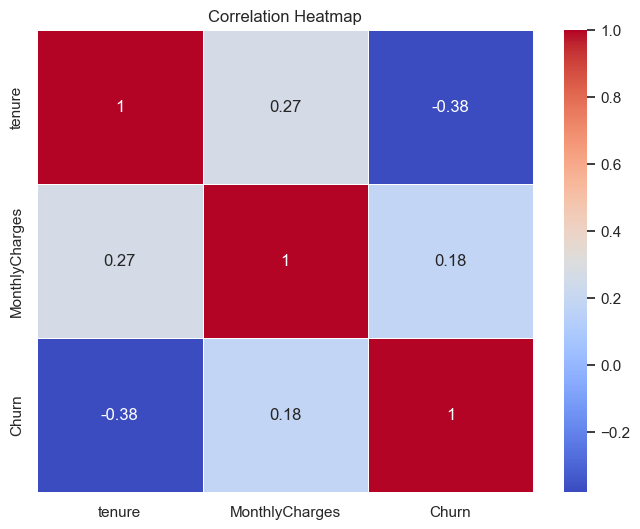

In [13]:
# Feature Selection (Numerical)Heatmap

num_data = data[['tenure','MonthlyCharges','Churn']]

plt.figure(figsize=(8, 6))
sns.heatmap(num_data.corr('spearman'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### **Hasil dari Correlation Matrix untuk Numerical Feature:**

- **Korelasi antara tenure dan Churn:**

Terdapat korelasi negatif antara tenure dan Churn. Ini menunjukkan bahwa semakin lama seorang pelanggan telah berlangganan (tenure lebih tinggi), semakin kecil kemungkinan mereka untuk berhenti berlangganan (Churn). Ini logis karena pelanggan yang telah lama berlangganan cenderung lebih setia dan mungkin telah menemukan nilai dalam layanan yang diberikan.

- **Korelasi antara MonthlyCharges dan Churn:**

Terdapat korelasi positif antara MonthlyCharges dan Churn. Ini menunjukkan bahwa semakin tinggi biaya bulanan yang dikenakan kepada pelanggan, semakin besar kemungkinan mereka untuk berhenti berlangganan. Ini juga masuk akal karena biaya yang lebih tinggi dapat menjadi faktor yang mendorong pelanggan untuk mencari alternatif yang lebih murah.

### **Hasil Feature Selection:**

Setelah melakukan tes pada feature categorical dan numerical pada dataset, semua feature dinyatakan memiliki korelasi terhadap target (Churn), sehingga feature yang digunakan untuk pada model Machine Learning adalah:

- Dependents (Categorical)
- Tenure (Numerical)
- OnlineSecurity (Categorical)
- OnlineBackup (Categorical)
- InternetService (Categorical)
- DeviceProtection (Categorical)
- TechSupport (Categorical)
- Contract (Categorical)
- PaperlessBilling (Categorical)
- MonthlyCharges (Numerical) 



### **Preprocessing**



In [14]:
# Determine Features type (Numerical or Categorical)

numerical_features = ['tenure', 'MonthlyCharges']
categorical_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore', drop='first'))
])

# Combine numerical and categorical pipelines into a ColumnTransformer
prepros = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ], remainder= 'passthrough'
)

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

In [15]:
# Spliting Data into training set and test set

x = data.drop('Churn', axis=1)
y = data['Churn']

xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y, 
    random_state= 2024,
    test_size= 0.2,
    stratify=y
)


**Parameter pada train_test_split**

- X dan y:

X: Data fitur.
y: Target atau label.

- random_state=2024:

Parameter ini digunakan untuk memastikan bahwa hasil pembagian data dapat direproduksi. Setiap kali kode ini dijalankan dengan random_state yang sama, pembagian data akan selalu sama. Ini penting untuk memastikan konsistensi dalam hasil eksperimen.

- test_size=0.2:

Parameter ini menentukan proporsi dari dataset yang akan digunakan sebagai data pengujian. Dalam hal ini, 20% dari data akan digunakan untuk pengujian, dan 80% untuk pelatihan.

- stratify=y:

Parameter ini digunakan untuk memastikan bahwa distribusi kelas dalam data pelatihan dan pengujian tetap sama dengan distribusi kelas dalam dataset asli. Ini penting untuk dataset yang memiliki distribusi kelas yang tidak seimbang, seperti dalam kasus churn pelanggan, di mana jumlah pelanggan yang churn dan tidak churn mungkin tidak seimbang.

- **Missing Value**  

Dari proses data understanding, tidak ditemukan missing value pada dataset, namun untuk menanggulangi kemungkinan data yang baru masuk memiliki missing value. maka proses penanganan missing value menggunakan Simple imputer dilakukan pada preprocessing dan model pipeline. Namun, strategy yang digunakan berbeda bagi numerical variable dan categorical variable, untuk numerical feature, strategy yang digunakan adalah mean dikarenakan data memiliki distribusi yang cukup normal. Selanjutnya pada Categorical Feature, mostfrequent digunakan untuk menjaga distribusi data dan menghindari pengenalan bias yang signifikan.

- **Encoding categorical variables** 

One Hot Encoding digunakan untuk penanganan kategorikal feature pada dataset ini, alasan nya karena jumlah kategori unik idak terlalu besar, dan lebih sederhana

- **Scaling for numerical variables** 

StandardScaler digunakan pada dataset ini dikarenakan numerikal variables pada dataset ini tidak memiliki outliers dan distribusi lebih mendekati normal, sehingga StandarScaler lebih tepat diguankan pada dataset ini



# Training Data Set & Model Evaluation

In [16]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=2024),
    'Decision Tree': DecisionTreeClassifier(random_state=2024),
    'Random Forest': RandomForestClassifier(random_state=2024),
    'Support Vector Machine': SVC(random_state=2024),
    'Gradient Boosting': GradientBoostingClassifier(random_state=2024)
}

# Dictionary to store results

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', prepros),
        ('Model', model)
    ])
    
    pipeline.fit(xtrain, ytrain)
    y_pred = pipeline.predict(xtest)
    
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    
    results[name] = [accuracy, precision, recall, f1]

    
# Show Model Evaluation Results

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.776876,0.599078,0.494297,0.541667
Decision Tree,0.733266,0.500000,0.479087,0.489320
Random Forest,0.776876,0.616216,0.433460,0.508929
Support Vector Machine,0.782961,0.643275,0.418251,0.506912
Gradient Boosting,0.783976,0.621359,0.486692,0.545842


Untuk meminimalkan false negatives, kita harus fokus pada model dengan recall yang tinggi. Recall mengukur proporsi kasus positif sebenarnya (misalnya, pelanggan yang akan churn) yang berhasil diidentifikasi oleh model. Meminimalkan false negatives sangat penting ketika kita perlu mengidentifikasi sebanyak mungkin kasus positif.

**2 Model Terbaik untuk Meminimalkan False Negatives (Recall Tinggi):**

Logistic Regression

Recall: 49,42%
Logistic Regression memiliki recall yang relatif tinggi, yang berarti model ini mampu mengidentifikasi proporsi churn yang lebih besar.
Gradient Boosting

Recall: 48,28%
Gradient Boosting juga memiliki performa yang baik dalam hal recall, hanya sedikit di bawah Logistic Regression, sehingga menjadi kandidat kuat lainnya untuk meminimalkan false negatives.



#### **Mengapa Memilih Model Ini?**

Logistic Regression: Model ini adalah model linear yang kurang rentan terhadap overfitting dan dapat di-tuning dengan mudah untuk lebih meningkatkan recall.

Gradient Boosting: Meskipun lebih kompleks, Gradient Boosting adalah model yang tangguh dan sering kali memberikan performa yang baik di berbagai metrik, termasuk recall.

### **Hyperparameter Tuning (Logistic Regression, Gradient Boosting)**

Melakukan Hyperparameter Tuning kepada 2 model terpilih untuk meningkatkan performance dari model dan menentukan model terbaik yang dapat digunakan

#### **Logistic Regression**

In [17]:
# Define parameter grid for Logistic Regression

param_grid_lr = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver':  ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'model__class_weight': [None, 'balanced']
}

# Pipeline grid for Logistic Regression

pipeline_lr = Pipeline(
    [('preprocessor', prepros), 
    ('model', LogisticRegression(random_state=2024, max_iter=10000))
])

grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring= 'recall')

# Fitting Model
grid_lr.fit(xtrain, ytrain)

best_lr_model = grid_lr.best_estimator_
best_lr_model




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=2024, solver='liblinear'))])

In [18]:
grid_lr.best_params_

{'model__C': 0.01,
 'model__class_weight': 'balanced',
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.0001}

In [37]:
grid_lr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unkno...
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['liblinear', 'saga', 'newton-cg',
                                           'lbfgs'],
                         'model__tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='recall')

In [19]:
# Metric Table

y_pred_lr = grid_lr.predict(xtest)
    
accuracy_lr = accuracy_score(ytest, y_pred_lr)
precision_lr = precision_score(ytest, y_pred_lr)
recall_lr = recall_score(ytest, y_pred_lr)
f1_lr = f1_score(ytest, y_pred_lr)
    
results_lr = {'Logistic Regression_Tuned' : [accuracy_lr, precision_lr, recall_lr, f1_lr]}
results_lr_df = pd.DataFrame(results_lr, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_lr_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression_Tuned,0.716024,0.480638,0.802281,0.60114


In [20]:
# Generate the classification report
y_pred_lr = best_lr_model.predict(xtest)
classification_rep_lr = classification_report(ytest, y_pred_lr)
print(classification_rep_lr)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       723
           1       0.48      0.80      0.60       263

    accuracy                           0.72       986
   macro avg       0.69      0.74      0.69       986
weighted avg       0.79      0.72      0.73       986



**Results**

Setelah melakukan Tuning pada Model Logistic Regression, hasil nilai pada metric Recall meningkat menjadi 0.80, sehingga performance model dianggap sangat baik untuk meminimalisir False Negative, namun dengan meingkat nya nilai Recall, nilai pada precision mengalami penurunan

#### **Gradient Boosting Classifier**

In [21]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': np.arange(300, 501, 50),
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Pipeline grid for Gradient Boosting
pipeline_gb = Pipeline(
    [('preprocessor', prepros), 
    ('model', GradientBoostingClassifier(random_state= 2024,n_iter_no_change=20))
])

grid_gb = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=5,n_jobs=-1, scoring= 'recall')


# Fitting Model
grid_gb.fit(xtrain, ytrain)

best_gb_model = grid_gb.best_estimator_
best_gb_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            min_samples_leaf=4,
                                            n_estimators=300,
                                            n_iter_no_change=20,
                                            random_state=2024,
                                            subsample=0.7))])

In [22]:
# Metric Table

y_pred_gb = grid_gb.predict(xtest)
    
accuracy_gb = accuracy_score(ytest, y_pred_gb)
precision_gb = precision_score(ytest, y_pred_gb)
recall_gb = recall_score(ytest, y_pred_gb)
f1_gb = f1_score(ytest, y_pred_gb)
    
results_gb = {'Gradien Boosting_Tuned' : [accuracy_gb, precision_gb, recall_gb, f1_gb]}
results_gb_df = pd.DataFrame(results_gb, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_gb_df

,Accuracy,Precision,Recall,F1-Score
Gradien Boosting_Tuned,0.787018,0.634518,0.475285,0.543478


In [23]:
# Generate the classification report
y_pred_gb = best_gb_model.predict(xtest)
classification_rep_gb = classification_report(ytest, y_pred_gb)
print(classification_rep_gb)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       723
           1       0.63      0.48      0.54       263

    accuracy                           0.79       986
   macro avg       0.73      0.69      0.70       986
weighted avg       0.77      0.79      0.78       986



**Results**

Hasil dari Hyperparameter Tuning pada Gradien Boooster Classification cukup mengecewakan  dengan penurunan score pada Recall dibandingkan dengan Baseline model Gradien Boosting Classification, percobaan sekali lagi dengan melakukan tuning ulang dengan parameter yang lebih spesifik pada Gradien Boosting Classification akan dilakukan untuk memastikan model ini tidak lebih baik dari Logsitic Regression 

#### **Refine Gradient Boosting Classifier**

In [24]:
# Refine parameter grid for Gradient Boosting
param_grid_gb2 = {
    'model__learning_rate': [0.15, 0.2, 0.25],
    'model__n_estimators': [250, 300, 350],
    'model__max_depth': [2, 3, 4],
    'model__min_samples_split': [2, 3],
    'model__min_samples_leaf': [3, 4, 5],
    'model__subsample': [0.6, 0.7, 0.8],
    'model__max_features': ['sqrt', 'log2']
}

# Pipeline grid for Gradient Boosting
pipeline_gb2 = Pipeline(
    [('preprocessor', prepros), 
    ('model', GradientBoostingClassifier(random_state= 2024,n_iter_no_change=20))
])

grid_gb2 = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=5,n_jobs=-1, scoring= 'recall')


# Fitting Model
grid_gb2.fit(xtrain, ytrain)

best_gb2_model = grid_gb2.best_estimator_
best_gb2_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            min_samples_leaf=4,
                                            n_estimators=300,
                                            n_iter_no_change=20,
                                            random_state=2024,
                                            subsample=0.7))])

In [25]:
# Generate the classification report

y_pred_gb2 = grid_gb2.predict(xtest)
classification_rep_gb2 = classification_report(ytest, y_pred_gb2)
print(classification_rep_gb2)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       723
           1       0.63      0.48      0.54       263

    accuracy                           0.79       986
   macro avg       0.73      0.69      0.70       986
weighted avg       0.77      0.79      0.78       986



In [26]:
# Metrics Table
    
accuracy_gb2 = accuracy_score(ytest, y_pred_gb2)
precision_gb2 = precision_score(ytest, y_pred_gb2)
recall_gb2 = recall_score(ytest, y_pred_gb2)
f1_gb2 = f1_score(ytest, y_pred_gb2)
    
results_gb2 = {'Gradien Boosting_Tuned' : [accuracy_gb2, precision_gb2, recall_gb2, f1_gb2]}
results_gb2_df = pd.DataFrame(results_gb2, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_gb2_df

,Accuracy,Precision,Recall,F1-Score
Gradien Boosting_Tuned,0.787018,0.634518,0.475285,0.543478


**Results**

Hasil refine Tuning dengan spesifik Parameter pada model Gradien Boosting Classification menghasilkan results yang lebih buruk dari sebelum nya. Sehingga baseline model Gradien Boosting Classifier lebih baik dan akan digunakan pada proses ensembling Model dengan Logistic Regression - Hyperparameter Tuning.

#### **Ensambling Model**

Melanjutkan pada evaluasi model dengan menggabungkan data untuk melihat hasil dari ensamble model akan memberikan result lebih baik





##### **Voting**

Menggunakan metode voting untuk mencoba menggabungkan dua model paling baik yaitu Logistic Regression (Dengan Hyperparameter Tuning) dan Gradien Boosting Classifier (Baseline Model) untuk melihat hasil voting ini dapat mengahasilkan result pada metric (terutama pada Recall) yang lebih baik

In [27]:
## Determine the model and parameters

logreg = LogisticRegression(C=0.01, class_weight='balanced',
                   penalty='l1', solver='liblinear', tol=0.0001)

gb = GradientBoostingClassifier(random_state= 2024)

# Voting Classifier

voting_clf = Pipeline(steps=[
    ('Preprocessor', prepros),
    ('Voting',VotingClassifier(estimators=[
    ('lr', logreg), ('gb', gb)
    ], voting='soft', weights=[0.8, 0.2]))
])

voting_clf.fit(xtrain, ytrain)
yvot = voting_clf.predict(xtest)

accuracy_vt = accuracy_score(ytest, yvot)
precision_vt = precision_score(ytest, yvot)
recall_vt = recall_score(ytest, yvot)
f1_vt = f1_score(ytest, yvot)
    
results_vt = {'Voting' : [accuracy_vt, precision_vt, recall_vt, f1_vt]}
results_vt_df = pd.DataFrame(results_vt, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_vt_df


,Accuracy,Precision,Recall,F1-Score
Voting,0.749493,0.521622,0.73384,0.609795


In [28]:
classification_rep_vt = classification_report(ytest, yvot)
print(classification_rep_vt)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       723
           1       0.52      0.73      0.61       263

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.75      0.76       986



**Results**

Hasil dari ensemble model melalui Soft Voting memberikan result yang cukup seimbang dari segi metric nya, namun hasil ini juga sedikit mengorbankan score recall dari yang sebelum nya mencapai 80% menjadi turun 73%

##### **Stacking**

Untuk mengimplementasikan stacking dengan Gradient Boosting Classifier (Baseline) dan Logistic Regression (Hyperparameter Tuning), kita dapat menggunakan stacking classifier yang menggabungkan kedua model ini dan kemudian menggunakan classifier lain (Logistic Regression) sebagai estimator akhir untuk membuat prediksi final.

In [29]:
# Define the meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = Pipeline(steps=[
    ('preprocessor', prepros),
    ('stacking', StackingClassifier(
        estimators=[
            ('lr', logreg),
            ('gb', gb)
        ],
        final_estimator=meta_model,
        cv=5    # Cross-validation for generating predictions for stacking
    ))
])

# Fit the stacked model
stacking_clf.fit(xtrain, ytrain)

# Predict on the test set
ystck = stacking_clf.predict(xtest)


accuracy_st = accuracy_score(ytest, ystck)
precision_st = precision_score(ytest, ystck)
recall_st = recall_score(ytest, ystck)
f1_st = f1_score(ytest, ystck)
    
results_st= {'Stacking' : [accuracy_st, precision_st, recall_st, f1_st]}
results_st_df = pd.DataFrame(results_st, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_st_df


,Accuracy,Precision,Recall,F1-Score
Stacking,0.783976,0.620192,0.490494,0.547771


In [30]:
classification_rep_stk = classification_report(ytest, ystck)
print(classification_rep_stk)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       723
           1       0.62      0.49      0.55       263

    accuracy                           0.78       986
   macro avg       0.72      0.69      0.70       986
weighted avg       0.77      0.78      0.78       986



**Results**

 Model stacking tampaknya memberikan keseimbangan yang baik antara presisi dan recall, akan tetapi nilai recall yang menjadi prioritas mengalami penurunan yang cukup besar

#### **CONFUSION MATRIX**

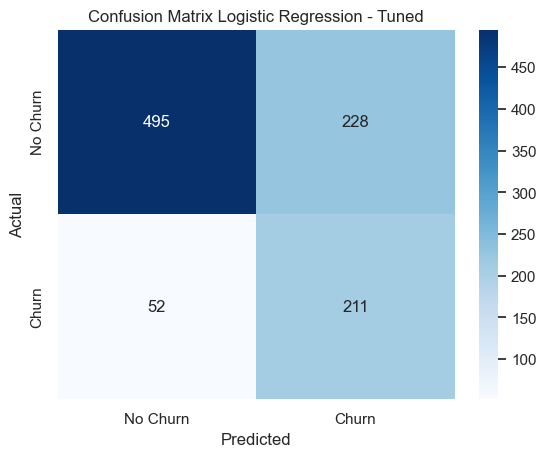

In [31]:
# Generate the confusion matrix (Logistic Regression - Hyperparameter Tuning)

conf_matrix = confusion_matrix(ytest, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression - Tuned')
plt.show()

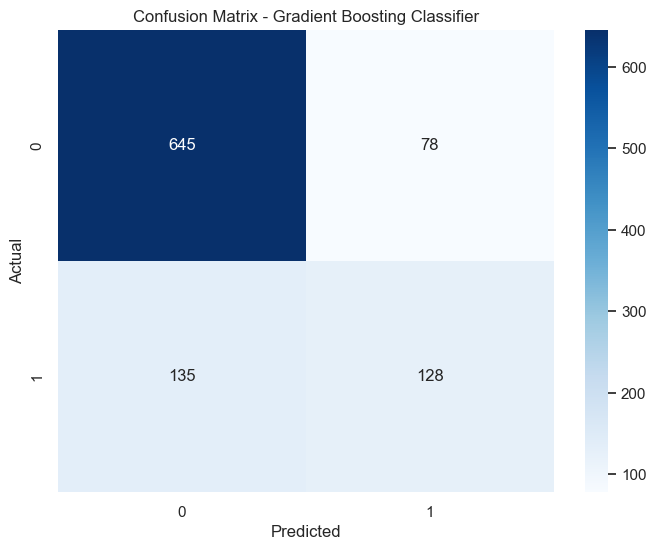

In [32]:
# Generate the confusion matrix (Gradien Boosting Classifier - Baseline Model)


pipeline_gb_or = Pipeline(steps=[
    ('preprocessor', prepros),
    ('Model', GradientBoostingClassifier(random_state=2024))
])

# Train the model
pipeline_gb_or.fit(xtrain, ytrain)

# Generate predictions
y_pred_gb_or = pipeline_gb_or.predict(xtest)

# Generate the confusion matrix
cm_gb = confusion_matrix(ytest, y_pred_gb_or)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

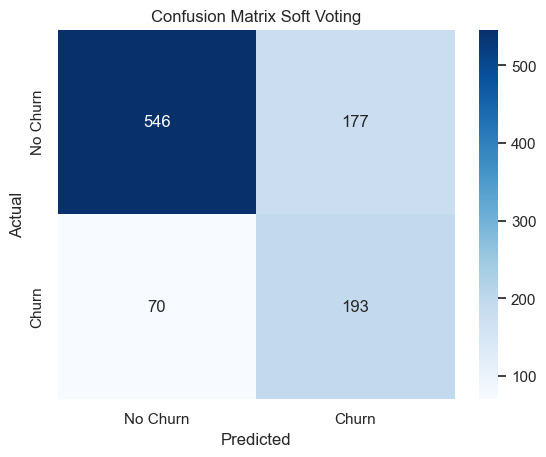

In [33]:
# Generate the confusion matrix (Voting)
conf_matrix = confusion_matrix(ytest, yvot)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Soft Voting')
plt.show()

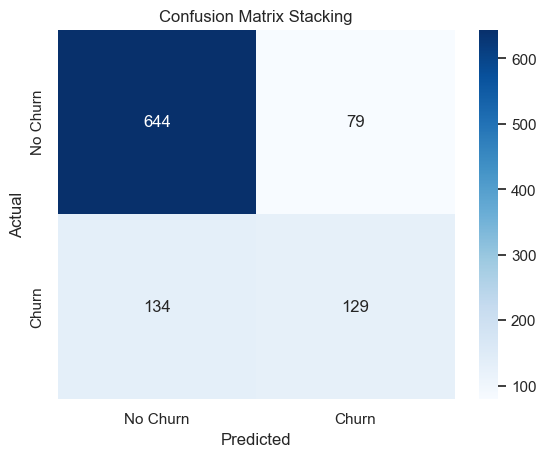

In [34]:
# Generate the confusion matrix (Stacking)
conf_matrix = confusion_matrix(ytest, ystck)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Stacking')
plt.show()

**Logistic Regression (Tuned):**

Model ini memiliki jumlah true positives yang tinggi (211), yang menunjukkan recall yang baik, tetapi juga memiliki jumlah false positives yang cukup tinggi (228), yang mengurangi presisi.

**Gradient Boosting Classifier:**

Model ini memiliki jumlah true negatives tertinggi (645), artinya model ini paling baik dalam mengidentifikasi kasus non-churn dengan benar, yang menghasilkan presisi tinggi. Namun, model ini kurang baik dalam recall, seperti yang terlihat dari tingginya jumlah false negatives (135).

**Soft Voting:**

Model soft voting memberikan keseimbangan yang baik antara true positives (193) dan true negatives (546). Model ini berhasil mengurangi false negatives dibandingkan dengan Gradient Boosting sambil mempertahankan jumlah false positives yang wajar.

**Stacking:**

Model stacking memiliki performa yang mirip dengan Gradient Boosting dengan jumlah true negatives yang tinggi (644) dan false positives yang rendah (79). Namun, model ini sedikit lebih baik dalam true positives (129) dibandingkan Gradient Boosting, sehingga memberikan keseimbangan yang lebih baik.

### **Conclusion**

Model Logistic Regression yang telah di-tuning diidentifikasi sebagai yang paling efektif untuk memprediksi churn pelanggan, Model ini menunjukkan akurasi sebesar 72%, dengan precision sebesar 90% untuk kelas "0" (tidak churn) dan 48% untuk kelas "1" (churn). Meskipun precision untuk kelas churn (48%) lebih rendah, recall sebesar 80% untuk kelas churn menunjukkan bahwa model ini efektif dalam menangkap mayoritas pelanggan yang benar-benar berisiko churn. F1-score sebesar 60% untuk kelas churn menunjukkan keseimbangan antara precision dan recall, meskipun dengan beberapa trade-off.

Implementasi model ini akan memungkinkan perusahaan untuk menyusun strategi retensi yang lebih proaktif, dengan fokus pada pelanggan yang paling mungkin churn, sehingga sumber daya dapat dialokasikan dengan lebih bijak. Keberhasilan strategi ini dapat diukur melalui penurunan nyata dalam tingkat churn, terutama karena model ini cukup handal dalam mengidentifikasi pelanggan yang berisiko tinggi churn.

#### **Saving Model**

In [35]:
import pickle

In [38]:

# Fit the model
grid_lr.fit(xtrain, ytrain)

# Save the model to a file
with open('Telco C.pkl', 'wb') as file:
    pickle.dump(model, file)